In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
%run connect_four_game.py
%run constants.py

In [13]:
def run_random_game():
    global x_wins
    global o_wins
    global draws
    global win_pos_x
    global win_pos_o
    game = ConnectFourGame()

    # initialize player number, move counter
    player = 1
    mvcntr = 1

    # initialize flag that indicates win
    no_winner_yet = True

    while game.move_still_possible() and no_winner_yet:
        # get player symbol
        name = symbols[player]
        #print '%s moves' % name

        # let player move at random
        game.make_move(player)

        # print current game state
        #game.print_game_state()

        # evaluate game state
        if game.move_was_winning_move():
            #print 'player %s wins after %d moves' % (name, mvcntr)
            no_winner_yet = False
            if player == 1:
                x_wins += 1
                win_pos_x[game.game_state == 1] +=1
            else:
                o_wins += 1
                win_pos_o[game.game_state == -1] +=1
#             print game.game_state
#             print '\n'
        # switch player and increase move counter
        player *= -1
        mvcntr += 1

    if no_winner_yet:
        # print 'game ended in a draw'
        draws += 1

In [18]:
x_wins, o_wins, draws = 0, 0, 0 
win_pos_x = np.zeros((n_rows, n_columns), dtype=int)
win_pos_o  = np.zeros((n_rows, n_columns), dtype=int)
for i in range(10):
    run_random_game()
print x_wins
print o_wins
print draws
print win_pos_x
print win_pos_o

5
5
0
[[0 0 0 1 0 0 0]
 [0 1 3 1 1 1 0]
 [2 0 1 3 1 1 1]
 [0 2 2 2 2 3 2]
 [1 2 2 2 2 1 1]
 [2 2 2 2 3 4 3]]
[[0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1]
 [1 1 1 1 1 0 1]
 [3 1 2 1 2 0 2]
 [2 2 2 3 4 3 2]
 [1 3 2 4 3 3 1]]


556
442
2


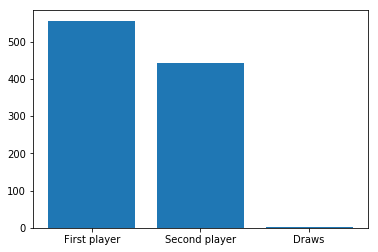

1117
883
0


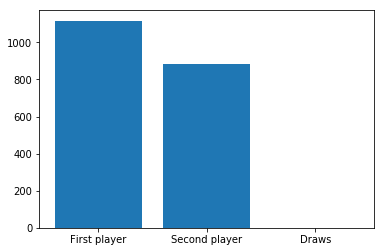

In [22]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

games_num = [1000, 2000]

for i in games_num:
    x_wins, o_wins, draws = 0, 0, 0
    for j in range(i):
        run_random_game()
    print x_wins
    print o_wins
    print draws
    x = np.arange(3)
    money = [x_wins, o_wins, draws]
    fig, ax = plt.subplots()
    plt.bar(x, money)
    plt.xticks(x, ('First player', 'Second player', 'Draws'))
    plt.show()

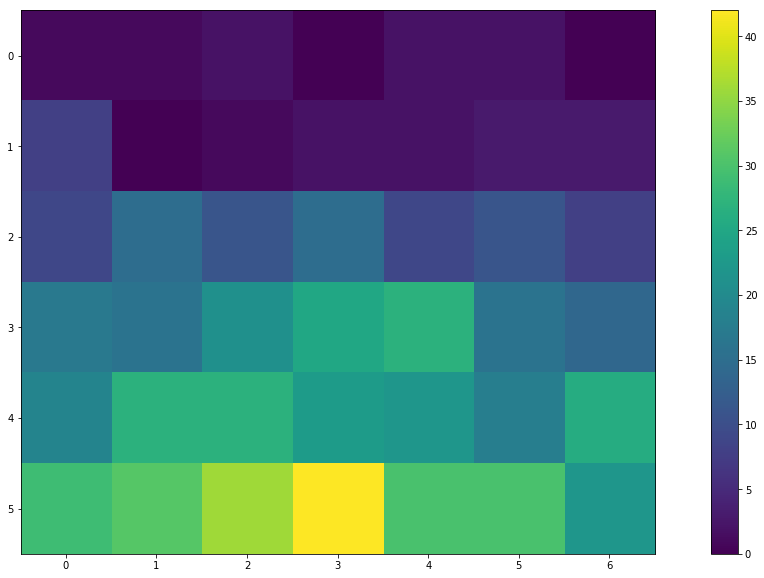

In [21]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_wins, o_wins, draws = 0, 0, 0 
win_pos_x = np.zeros((n_rows, n_columns), dtype=int)
win_pos_o  = np.zeros((n_rows, n_columns), dtype=int)
for i in range(100):
    run_random_game()

plt.figure(figsize = (20,10))
plt.imshow(win_pos_x)
plt.colorbar()

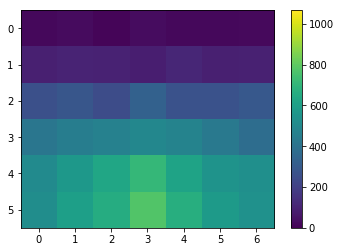

In [23]:
plt.imshow(win_pos_o, vmin=0, vmax=win_pos_x.max())
plt.colorbar()

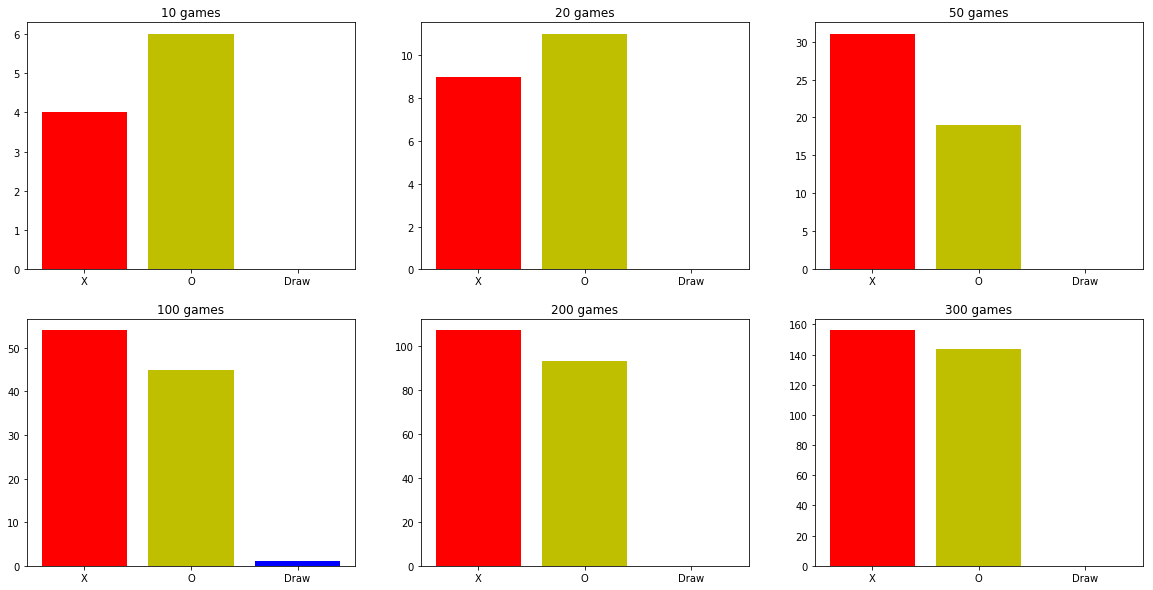

In [24]:
import matplotlib.pyplot as plt
plt.subplots(2, 3, figsize=(20, 10))

games_num = [10, 20, 50, 100, 200, 300]
k = 1
for i in games_num:
    x_wins, o_wins, draws = 0, 0, 0 
    for j in range(i):
        run_random_game()
    x = np.arange(3)
    money = [x_wins, o_wins, draws]
    plt.subplot(2, 3, k)
    k+=1
    plt.bar(x, money,color=['r', 'y', 'b'])
    plt.xticks(x, ('X', 'O', 'Draw'))
    plt.title(str(i) + ' games')  

plt.show()